In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

111


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:1125
number of class2:492

 ****** Running generation 0 ****** 

Population's average fitness: 0.45391 stdev: 0.13626
Best fitness: 0.71738 - size: (2, 13) - species 3 - id 11
Average adjusted fitness: 0.182
Mean genetic distance 2.915, standard deviation 0.455
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.625 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54191 stdev: 0.14403
Best fitness: 0.77242 - size: (2, 14) - species 25 - id 384
Average adjusted fitness: 0.368
Mean genetic distance 2.974, standard deviation 0.445
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 11.660 sec (10.143 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58539 stdev: 0.14482
Best fitness: 0.77242 - size: (2, 14) - species 26 - id 384
Average adjusted fitness: 0.303
Mean genetic distance 2.983, standard deviation 0.460
Population of 203 members in 32 speci


 ****** Running generation 0 ****** 

Population's average fitness: 0.41161 stdev: 0.28668
Best fitness: 0.91713 - size: (2, 13) - species 3 - id 83
Average adjusted fitness: 0.307
Mean genetic distance 2.900, standard deviation 0.465
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 24.425 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65451 stdev: 0.26605
Best fitness: 0.93197 - size: (2, 14) - species 22 - id 344
Average adjusted fitness: 0.577
Mean genetic distance 3.006, standard deviation 0.474
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 17.028 sec (20.727 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.74312 stdev: 0.23311
Best fitness: 0.93197 - size: (2, 14) - species 22 - id 344
Average adjusted fitness: 0.614
Mean genetic distance 3.028, standard deviation 0.468
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 14.256 sec (18.

Population's average fitness: 0.45892 stdev: 0.20391
Best fitness: 0.81138 - size: (2, 13) - species 2 - id 142
Average adjusted fitness: 0.278
Mean genetic distance 3.005, standard deviation 0.483
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 12.103 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57778 stdev: 0.21154
Best fitness: 0.83735 - size: (3, 14) - species 27 - id 377
Average adjusted fitness: 0.355
Mean genetic distance 3.082, standard deviation 0.480
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 12.627 sec (12.365 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60698 stdev: 0.22246
Best fitness: 0.84910 - size: (3, 16) - species 2 - id 526
Average adjusted fitness: 0.373
Mean genetic distance 3.087, standard deviation 0.490
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 13.695 sec (12.808 average)

 ****** Running generatio

Population's average fitness: 0.48862 stdev: 0.08367
Best fitness: 0.68089 - size: (2, 13) - species 3 - id 123
Average adjusted fitness: 0.185
Mean genetic distance 2.876, standard deviation 0.486
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 12.571 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54371 stdev: 0.08684
Best fitness: 0.68398 - size: (3, 15) - species 8 - id 281
Average adjusted fitness: 0.178
Mean genetic distance 3.041, standard deviation 0.463
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 12.908 sec (12.740 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55404 stdev: 0.08544
Best fitness: 0.71058 - size: (3, 13) - species 14 - id 479
Average adjusted fitness: 0.173
Mean genetic distance 3.080, standard deviation 0.445
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 13.695 sec (13.058 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.52476 stdev: 0.09289
Best fitness: 0.71429 - size: (2, 13) - species 8 - id 171
Average adjusted fitness: 0.270
Mean genetic distance 2.953, standard deviation 0.503
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 13.104 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56388 stdev: 0.09540
Best fitness: 0.73284 - size: (2, 13) - species 19 - id 339
Average adjusted fitness: 0.233
Mean genetic distance 3.021, standard deviation 0.497
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 13.126 sec (13.115 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57491 stdev: 0.09358
Best fitness: 0.73408 - size: (3, 14) - species 5 - id 455
Average adjusted fitness: 0.222
Mean genetic distance 3.026, standard deviation 0.495
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 14.327 sec (13.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47015 stdev: 0.09395
Best fitness: 0.72665 - size: (2, 13) - species 5 - id 98
Average adjusted fitness: 0.226
Mean genetic distance 2.860, standard deviation 0.493
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 15.163 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53418 stdev: 0.09738
Best fitness: 0.72851 - size: (3, 15) - species 5 - id 375
Average adjusted fitness: 0.246
Mean genetic distance 2.924, standard deviation 0.499
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.471 sec (16.817 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56080 stdev: 0.09542
Best fitness: 0.72851 - size: (3, 15) - species 5 - id 375
Average adjusted fitness: 0.200
Mean genetic distance 2.963, standard deviation 0.490
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.204 sec (17.27

Population's average fitness: 0.54654 stdev: 0.15177
Best fitness: 0.83179 - size: (2, 13) - species 3 - id 104
Average adjusted fitness: 0.329
Mean genetic distance 2.929, standard deviation 0.507
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.207 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60425 stdev: 0.15128
Best fitness: 0.85776 - size: (3, 14) - species 20 - id 328
Average adjusted fitness: 0.382
Mean genetic distance 3.082, standard deviation 0.492
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.924 sec (7.566 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62094 stdev: 0.15515
Best fitness: 0.85776 - size: (3, 14) - species 20 - id 328
Average adjusted fitness: 0.336
Mean genetic distance 3.108, standard deviation 0.494
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.449 sec (7.860 average)

 ****** Running generation 3 

Population's average fitness: 0.51714 stdev: 0.14591
Best fitness: 0.76005 - size: (2, 13) - species 5 - id 83
Average adjusted fitness: 0.301
Mean genetic distance 2.956, standard deviation 0.473
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.267 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58172 stdev: 0.15772
Best fitness: 0.77984 - size: (3, 15) - species 27 - id 369
Average adjusted fitness: 0.335
Mean genetic distance 3.001, standard deviation 0.468
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 9.468 sec (8.368 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61275 stdev: 0.14796
Best fitness: 0.80087 - size: (2, 12) - species 27 - id 539
Average adjusted fitness: 0.374
Mean genetic distance 3.005, standard deviation 0.457
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.816 sec (8.517 average)

 ****** Running generation 3 *

Population's average fitness: 0.49411 stdev: 0.06814
Best fitness: 0.71738 - size: (2, 13) - species 2 - id 196
Average adjusted fitness: 0.186
Mean genetic distance 2.920, standard deviation 0.468
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 9.891 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52649 stdev: 0.06780
Best fitness: 0.72480 - size: (3, 14) - species 11 - id 283
Average adjusted fitness: 0.182
Mean genetic distance 3.030, standard deviation 0.469
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.905 sec (9.898 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54264 stdev: 0.07332
Best fitness: 0.72665 - size: (2, 14) - species 16 - id 464
Average adjusted fitness: 0.196
Mean genetic distance 3.053, standard deviation 0.486
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 11.069 sec (10.288 average)

 ****** Running generation 

Population's average fitness: 0.47939 stdev: 0.08584
Best fitness: 0.68522 - size: (2, 13) - species 1 - id 67
Average adjusted fitness: 0.168
Mean genetic distance 2.968, standard deviation 0.487
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 9.302 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54269 stdev: 0.08886
Best fitness: 0.74150 - size: (2, 14) - species 15 - id 256
Average adjusted fitness: 0.248
Mean genetic distance 3.071, standard deviation 0.485
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 8.570 sec (8.936 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56362 stdev: 0.08764
Best fitness: 0.75201 - size: (2, 15) - species 7 - id 521
Average adjusted fitness: 0.239
Mean genetic distance 3.076, standard deviation 0.497
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 10.624 sec (9.499 average)

 ****** Running generation 3 *

Population's average fitness: 0.52435 stdev: 0.08797
Best fitness: 0.67223 - size: (2, 13) - species 5 - id 140
Average adjusted fitness: 0.247
Mean genetic distance 3.006, standard deviation 0.440
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 8.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56758 stdev: 0.07703
Best fitness: 0.74273 - size: (3, 15) - species 32 - id 326
Average adjusted fitness: 0.190
Mean genetic distance 2.983, standard deviation 0.450
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 9.886 sec (8.954 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56952 stdev: 0.08389
Best fitness: 0.74273 - size: (3, 15) - species 32 - id 326
Average adjusted fitness: 0.230
Mean genetic distance 2.969, standard deviation 0.459
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 8.624 sec (8.844 average)

 ****** Running generation 3 

Population's average fitness: 0.52726 stdev: 0.09689
Best fitness: 0.75572 - size: (2, 13) - species 3 - id 144
Average adjusted fitness: 0.268
Mean genetic distance 2.867, standard deviation 0.488
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.268 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56827 stdev: 0.08910
Best fitness: 0.75572 - size: (2, 13) - species 4 - id 144
Average adjusted fitness: 0.215
Mean genetic distance 2.945, standard deviation 0.483
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.926 sec (7.597 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57364 stdev: 0.09497
Best fitness: 0.76314 - size: (2, 13) - species 22 - id 543
Average adjusted fitness: 0.219
Mean genetic distance 2.993, standard deviation 0.507
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 8.589 sec (7.928 average)

 ****** Running generation 3 *


 ****** Running generation 0 ****** 

Population's average fitness: 0.47333 stdev: 0.09462
Best fitness: 0.72789 - size: (2, 13) - species 4 - id 71
Average adjusted fitness: 0.168
Mean genetic distance 2.829, standard deviation 0.437
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 10.877 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53487 stdev: 0.09713
Best fitness: 0.72789 - size: (2, 13) - species 4 - id 71
Average adjusted fitness: 0.217
Mean genetic distance 2.941, standard deviation 0.478
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 12.698 sec (11.787 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55541 stdev: 0.09243
Best fitness: 0.72789 - size: (2, 13) - species 4 - id 71
Average adjusted fitness: 0.197
Mean genetic distance 2.970, standard deviation 0.498
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 14.158 sec (12.577 

Population's average fitness: 0.47706 stdev: 0.08334
Best fitness: 0.65986 - size: (2, 13) - species 4 - id 77
Average adjusted fitness: 0.148
Mean genetic distance 2.953, standard deviation 0.482
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.952 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52222 stdev: 0.08370
Best fitness: 0.72171 - size: (3, 15) - species 15 - id 281
Average adjusted fitness: 0.209
Mean genetic distance 3.033, standard deviation 0.484
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 10.749 sec (10.350 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55335 stdev: 0.07781
Best fitness: 0.72171 - size: (3, 15) - species 15 - id 281
Average adjusted fitness: 0.217
Mean genetic distance 3.077, standard deviation 0.489
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 13.781 sec (11.494 average)

 ****** Running generation

Population's average fitness: 0.50340 stdev: 0.07303
Best fitness: 0.70501 - size: (2, 13) - species 3 - id 175
Average adjusted fitness: 0.278
Mean genetic distance 2.949, standard deviation 0.474
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.495 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53789 stdev: 0.08122
Best fitness: 0.74954 - size: (3, 14) - species 2 - id 275
Average adjusted fitness: 0.250
Mean genetic distance 3.090, standard deviation 0.475
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 21.929 sec (18.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55466 stdev: 0.08214
Best fitness: 0.79097 - size: (3, 15) - species 18 - id 527
Average adjusted fitness: 0.187
Mean genetic distance 3.179, standard deviation 0.473
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 18.920 sec (18.781 average)

 ****** Running generatio

Population's average fitness: 0.48590 stdev: 0.08354
Best fitness: 0.67409 - size: (2, 13) - species 7 - id 106
Average adjusted fitness: 0.133
Mean genetic distance 2.875, standard deviation 0.455
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 11.932 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52879 stdev: 0.08135
Best fitness: 0.68460 - size: (3, 15) - species 7 - id 364
Average adjusted fitness: 0.179
Mean genetic distance 2.988, standard deviation 0.504
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 12.199 sec (12.066 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55552 stdev: 0.08633
Best fitness: 0.72789 - size: (3, 16) - species 28 - id 532
Average adjusted fitness: 0.225
Mean genetic distance 3.072, standard deviation 0.493
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 13.470 sec (12.534 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.51845 stdev: 0.09119
Best fitness: 0.68831 - size: (2, 13) - species 3 - id 15
Average adjusted fitness: 0.252
Mean genetic distance 2.907, standard deviation 0.451
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 17.152 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54848 stdev: 0.08478
Best fitness: 0.68831 - size: (2, 13) - species 3 - id 15
Average adjusted fitness: 0.240
Mean genetic distance 2.983, standard deviation 0.461
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 16.565 sec (16.858 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56135 stdev: 0.08689
Best fitness: 0.70377 - size: (2, 14) - species 11 - id 482
Average adjusted fitness: 0.222
Mean genetic distance 2.941, standard deviation 0.466
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 20.427 sec (18.04


 ****** Running generation 0 ****** 

Population's average fitness: 0.49795 stdev: 0.07894
Best fitness: 0.74644 - size: (2, 13) - species 7 - id 37
Average adjusted fitness: 0.279
Mean genetic distance 2.977, standard deviation 0.459
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 12.337 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54191 stdev: 0.08446
Best fitness: 0.76747 - size: (3, 15) - species 8 - id 217
Average adjusted fitness: 0.245
Mean genetic distance 3.012, standard deviation 0.451
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 12.189 sec (12.263 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56029 stdev: 0.08977
Best fitness: 0.77551 - size: (2, 13) - species 16 - id 500
Average adjusted fitness: 0.277
Mean genetic distance 2.997, standard deviation 0.466
Population of 209 members in 45 species
Total extinctions: 0
Generation time: 13.779 sec (12.7

Population's average fitness: 0.45653 stdev: 0.15794
Best fitness: 0.78417 - size: (2, 13) - species 6 - id 109
Average adjusted fitness: 0.234
Mean genetic distance 2.845, standard deviation 0.452
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 10.633 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55480 stdev: 0.15554
Best fitness: 0.84045 - size: (2, 13) - species 2 - id 302
Average adjusted fitness: 0.272
Mean genetic distance 2.992, standard deviation 0.464
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 11.780 sec (11.206 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59457 stdev: 0.14926
Best fitness: 0.84045 - size: (2, 13) - species 2 - id 302
Average adjusted fitness: 0.379
Mean genetic distance 3.036, standard deviation 0.487
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 13.379 sec (11.930 average)

 ****** Running generation

Population's average fitness: 0.46230 stdev: 0.14527
Best fitness: 0.75819 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.219
Mean genetic distance 2.882, standard deviation 0.481
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 10.704 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54608 stdev: 0.15986
Best fitness: 0.79035 - size: (3, 15) - species 19 - id 344
Average adjusted fitness: 0.301
Mean genetic distance 2.942, standard deviation 0.456
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 11.702 sec (11.203 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58989 stdev: 0.15404
Best fitness: 0.79035 - size: (3, 15) - species 1 - id 344
Average adjusted fitness: 0.362
Mean genetic distance 3.023, standard deviation 0.466
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 12.425 sec (11.610 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.49920 stdev: 0.06520
Best fitness: 0.68831 - size: (2, 13) - species 3 - id 52
Average adjusted fitness: 0.190
Mean genetic distance 2.916, standard deviation 0.481
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 14.173 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53174 stdev: 0.07070
Best fitness: 0.69821 - size: (3, 15) - species 19 - id 380
Average adjusted fitness: 0.213
Mean genetic distance 2.937, standard deviation 0.469
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 20.024 sec (17.099 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54797 stdev: 0.07167
Best fitness: 0.72727 - size: (3, 15) - species 20 - id 429
Average adjusted fitness: 0.239
Mean genetic distance 2.994, standard deviation 0.487
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 14.065 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47662 stdev: 0.08314
Best fitness: 0.65677 - size: (2, 13) - species 3 - id 179
Average adjusted fitness: 0.197
Mean genetic distance 2.947, standard deviation 0.489
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 20.635 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53274 stdev: 0.08605
Best fitness: 0.66976 - size: (3, 15) - species 2 - id 245
Average adjusted fitness: 0.233
Mean genetic distance 3.057, standard deviation 0.472
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 20.610 sec (20.622 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54646 stdev: 0.08398
Best fitness: 0.67842 - size: (3, 15) - species 6 - id 487
Average adjusted fitness: 0.192
Mean genetic distance 3.090, standard deviation 0.471
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 22.805 sec (21.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.51963 stdev: 0.09892
Best fitness: 0.75881 - size: (2, 13) - species 3 - id 164
Average adjusted fitness: 0.227
Mean genetic distance 2.892, standard deviation 0.479
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 18.081 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57589 stdev: 0.08793
Best fitness: 0.77056 - size: (2, 12) - species 4 - id 292
Average adjusted fitness: 0.299
Mean genetic distance 2.993, standard deviation 0.497
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.756 sec (18.919 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57708 stdev: 0.09829
Best fitness: 0.78417 - size: (4, 17) - species 27 - id 521
Average adjusted fitness: 0.275
Mean genetic distance 2.983, standard deviation 0.486
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 20.100 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.44662 stdev: 0.13112
Best fitness: 0.72356 - size: (2, 13) - species 3 - id 117
Average adjusted fitness: 0.203
Mean genetic distance 2.928, standard deviation 0.481
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 20.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54574 stdev: 0.14652
Best fitness: 0.72356 - size: (2, 13) - species 4 - id 117
Average adjusted fitness: 0.319
Mean genetic distance 3.042, standard deviation 0.497
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 21.100 sec (20.863 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60170 stdev: 0.13311
Best fitness: 0.73284 - size: (3, 16) - species 30 - id 499
Average adjusted fitness: 0.297
Mean genetic distance 3.111, standard deviation 0.488
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 22.215 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47397 stdev: 0.09188
Best fitness: 0.72665 - size: (2, 13) - species 1 - id 55
Average adjusted fitness: 0.191
Mean genetic distance 2.917, standard deviation 0.463
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 40.732 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53927 stdev: 0.09672
Best fitness: 0.74088 - size: (2, 14) - species 7 - id 319
Average adjusted fitness: 0.229
Mean genetic distance 3.034, standard deviation 0.493
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 43.178 sec (41.955 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55378 stdev: 0.09780
Best fitness: 0.80148 - size: (4, 16) - species 4 - id 499
Average adjusted fitness: 0.236
Mean genetic distance 3.077, standard deviation 0.470
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 36.676 sec (40.19


 ****** Running generation 0 ****** 

Population's average fitness: 0.50297 stdev: 0.05052
Best fitness: 0.63946 - size: (2, 13) - species 1 - id 144
Average adjusted fitness: 0.210
Mean genetic distance 2.941, standard deviation 0.479
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 39.488 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52472 stdev: 0.05026
Best fitness: 0.65368 - size: (3, 13) - species 1 - id 362
Average adjusted fitness: 0.146
Mean genetic distance 3.067, standard deviation 0.496
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 38.839 sec (39.163 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53381 stdev: 0.06053
Best fitness: 0.75263 - size: (4, 17) - species 29 - id 512
Average adjusted fitness: 0.162
Mean genetic distance 3.082, standard deviation 0.480
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 46.656 sec (41.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51288 stdev: 0.08504
Best fitness: 0.77675 - size: (2, 13) - species 5 - id 142
Average adjusted fitness: 0.319
Mean genetic distance 2.936, standard deviation 0.516
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.535 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54564 stdev: 0.08347
Best fitness: 0.77675 - size: (2, 13) - species 5 - id 142
Average adjusted fitness: 0.252
Mean genetic distance 3.078, standard deviation 0.490
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 17.092 sec (15.314 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55720 stdev: 0.08946
Best fitness: 0.78973 - size: (3, 15) - species 2 - id 529
Average adjusted fitness: 0.211
Mean genetic distance 3.085, standard deviation 0.478
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 13.793 sec (14.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.50181 stdev: 0.07408
Best fitness: 0.72233 - size: (2, 13) - species 4 - id 92
Average adjusted fitness: 0.311
Mean genetic distance 2.982, standard deviation 0.467
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 15.733 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53662 stdev: 0.06822
Best fitness: 0.76685 - size: (3, 14) - species 6 - id 290
Average adjusted fitness: 0.166
Mean genetic distance 3.013, standard deviation 0.468
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 15.099 sec (15.416 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54344 stdev: 0.07497
Best fitness: 0.76685 - size: (3, 14) - species 3 - id 290
Average adjusted fitness: 0.243
Mean genetic distance 2.996, standard deviation 0.474
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 17.188 sec (16.00


 ****** Running generation 0 ****** 

Population's average fitness: 0.49517 stdev: 0.05082
Best fitness: 0.64997 - size: (2, 13) - species 4 - id 15
Average adjusted fitness: 0.188
Mean genetic distance 2.953, standard deviation 0.501
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 17.822 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52030 stdev: 0.04736
Best fitness: 0.64997 - size: (2, 13) - species 4 - id 15
Average adjusted fitness: 0.115
Mean genetic distance 3.027, standard deviation 0.519
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.315 sec (18.569 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53139 stdev: 0.04927
Best fitness: 0.64997 - size: (2, 13) - species 28 - id 15
Average adjusted fitness: 0.107
Mean genetic distance 3.056, standard deviation 0.501
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 22.253 sec (19.797


Population's average fitness: 0.48451 stdev: 0.10024
Best fitness: 0.75448 - size: (2, 13) - species 5 - id 28
Average adjusted fitness: 0.239
Mean genetic distance 2.908, standard deviation 0.456
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.519 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53964 stdev: 0.10219
Best fitness: 0.75448 - size: (2, 13) - species 3 - id 97
Average adjusted fitness: 0.245
Mean genetic distance 3.001, standard deviation 0.458
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 15.074 sec (14.797 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56591 stdev: 0.10720
Best fitness: 0.82684 - size: (2, 14) - species 6 - id 470
Average adjusted fitness: 0.279
Mean genetic distance 2.992, standard deviation 0.475
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 15.559 sec (15.051 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50613 stdev: 0.06773
Best fitness: 0.72356 - size: (2, 13) - species 2 - id 108
Average adjusted fitness: 0.209
Mean genetic distance 2.916, standard deviation 0.480
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 14.663 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54056 stdev: 0.06777
Best fitness: 0.73655 - size: (3, 15) - species 3 - id 335
Average adjusted fitness: 0.186
Mean genetic distance 2.975, standard deviation 0.487
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 17.357 sec (16.010 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55156 stdev: 0.08106
Best fitness: 0.78169 - size: (3, 15) - species 3 - id 521
Average adjusted fitness: 0.200
Mean genetic distance 3.024, standard deviation 0.481
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 20.657 sec (17.5

Population's average fitness: 0.51938 stdev: 0.09246
Best fitness: 0.72480 - size: (2, 13) - species 3 - id 195
Average adjusted fitness: 0.223
Mean genetic distance 2.953, standard deviation 0.483
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 9.639 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56306 stdev: 0.08012
Best fitness: 0.72727 - size: (2, 14) - species 1 - id 382
Average adjusted fitness: 0.237
Mean genetic distance 3.055, standard deviation 0.487
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 12.731 sec (11.185 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55613 stdev: 0.08975
Best fitness: 0.72727 - size: (2, 14) - species 1 - id 382
Average adjusted fitness: 0.195
Mean genetic distance 3.051, standard deviation 0.484
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 11.842 sec (11.404 average)

 ****** Running generation 

Population's average fitness: 0.52059 stdev: 0.08514
Best fitness: 0.68522 - size: (2, 13) - species 1 - id 39
Average adjusted fitness: 0.219
Mean genetic distance 3.004, standard deviation 0.489
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 9.450 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55597 stdev: 0.08589
Best fitness: 0.72294 - size: (3, 14) - species 5 - id 265
Average adjusted fitness: 0.291
Mean genetic distance 3.083, standard deviation 0.485
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 12.080 sec (10.765 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55604 stdev: 0.09058
Best fitness: 0.72294 - size: (3, 14) - species 5 - id 265
Average adjusted fitness: 0.170
Mean genetic distance 3.162, standard deviation 0.488
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 10.872 sec (10.801 average)

 ****** Running generation 3

Population's average fitness: 0.45656 stdev: 0.14260
Best fitness: 0.71614 - size: (2, 13) - species 2 - id 44
Average adjusted fitness: 0.239
Mean genetic distance 2.883, standard deviation 0.482
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 9.546 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56426 stdev: 0.14163
Best fitness: 0.72975 - size: (3, 16) - species 6 - id 351
Average adjusted fitness: 0.291
Mean genetic distance 2.999, standard deviation 0.477
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 10.940 sec (10.243 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58947 stdev: 0.14394
Best fitness: 0.73531 - size: (2, 14) - species 12 - id 449
Average adjusted fitness: 0.303
Mean genetic distance 3.069, standard deviation 0.504
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 12.634 sec (11.040 average)

 ****** Running generation 

Population's average fitness: 0.44915 stdev: 0.13713
Best fitness: 0.72418 - size: (2, 13) - species 4 - id 95
Average adjusted fitness: 0.181
Mean genetic distance 2.952, standard deviation 0.497
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.987 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55045 stdev: 0.14109
Best fitness: 0.73160 - size: (3, 15) - species 7 - id 262
Average adjusted fitness: 0.268
Mean genetic distance 3.054, standard deviation 0.464
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 9.745 sec (9.366 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60269 stdev: 0.13189
Best fitness: 0.73902 - size: (4, 15) - species 31 - id 469
Average adjusted fitness: 0.298
Mean genetic distance 3.108, standard deviation 0.485
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 10.548 sec (9.760 average)

 ****** Running generation 3 *

Population's average fitness: 0.48524 stdev: 0.10475
Best fitness: 0.77489 - size: (2, 13) - species 4 - id 179
Average adjusted fitness: 0.253
Mean genetic distance 3.026, standard deviation 0.474
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.228 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53637 stdev: 0.10112
Best fitness: 0.77489 - size: (2, 13) - species 4 - id 179
Average adjusted fitness: 0.231
Mean genetic distance 3.080, standard deviation 0.475
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 9.993 sec (9.610 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56459 stdev: 0.09668
Best fitness: 0.78912 - size: (2, 14) - species 4 - id 521
Average adjusted fitness: 0.213
Mean genetic distance 3.108, standard deviation 0.465
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 10.769 sec (9.997 average)

 ****** Running generation 3 *

Population's average fitness: 0.47126 stdev: 0.08676
Best fitness: 0.71305 - size: (2, 13) - species 6 - id 69
Average adjusted fitness: 0.160
Mean genetic distance 2.973, standard deviation 0.474
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.930 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52988 stdev: 0.09146
Best fitness: 0.72109 - size: (3, 14) - species 11 - id 235
Average adjusted fitness: 0.227
Mean genetic distance 3.076, standard deviation 0.488
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 9.273 sec (9.102 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54634 stdev: 0.09244
Best fitness: 0.74026 - size: (4, 16) - species 11 - id 535
Average adjusted fitness: 0.224
Mean genetic distance 3.085, standard deviation 0.487
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.651 sec (9.285 average)

 ****** Running generation 3 *

Population's average fitness: 0.50118 stdev: 0.06266
Best fitness: 0.68707 - size: (2, 13) - species 5 - id 58
Average adjusted fitness: 0.218
Mean genetic distance 3.013, standard deviation 0.514
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.880 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52671 stdev: 0.06077
Best fitness: 0.69202 - size: (2, 13) - species 2 - id 340
Average adjusted fitness: 0.188
Mean genetic distance 3.108, standard deviation 0.508
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.384 sec (9.132 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54335 stdev: 0.06454
Best fitness: 0.71800 - size: (3, 16) - species 9 - id 403
Average adjusted fitness: 0.179
Mean genetic distance 3.101, standard deviation 0.513
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.850 sec (9.371 average)

 ****** Running generation 3 ***

Population's average fitness: 0.43828 stdev: 0.20601
Best fitness: 0.81262 - size: (2, 13) - species 1 - id 93
Average adjusted fitness: 0.248
Mean genetic distance 2.880, standard deviation 0.473
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.370 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56744 stdev: 0.20689
Best fitness: 0.82498 - size: (3, 14) - species 6 - id 238
Average adjusted fitness: 0.348
Mean genetic distance 2.995, standard deviation 0.467
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.983 sec (8.176 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61029 stdev: 0.22065
Best fitness: 0.84539 - size: (4, 16) - species 6 - id 539
Average adjusted fitness: 0.406
Mean genetic distance 3.085, standard deviation 0.470
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 8.185 sec (8.179 average)

 ****** Running generation 3 ***

Population's average fitness: 0.56638 stdev: 0.14602
Best fitness: 0.79283 - size: (2, 13) - species 1 - id 73
Average adjusted fitness: 0.330
Mean genetic distance 2.992, standard deviation 0.464
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.765 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58996 stdev: 0.14921
Best fitness: 0.80148 - size: (3, 14) - species 17 - id 260
Average adjusted fitness: 0.297
Mean genetic distance 3.050, standard deviation 0.451
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 8.257 sec (8.011 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60361 stdev: 0.15463
Best fitness: 0.80148 - size: (3, 14) - species 17 - id 260
Average adjusted fitness: 0.362
Mean genetic distance 3.066, standard deviation 0.453
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 9.354 sec (8.458 average)

 ****** Running generation 3 *

Population's average fitness: 0.47898 stdev: 0.09527
Best fitness: 0.74088 - size: (2, 13) - species 3 - id 158
Average adjusted fitness: 0.203
Mean genetic distance 2.974, standard deviation 0.456
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.971 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53535 stdev: 0.10024
Best fitness: 0.74768 - size: (2, 14) - species 30 - id 382
Average adjusted fitness: 0.225
Mean genetic distance 3.008, standard deviation 0.461
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.526 sec (8.248 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57316 stdev: 0.09498
Best fitness: 0.74768 - size: (2, 14) - species 30 - id 382
Average adjusted fitness: 0.227
Mean genetic distance 3.001, standard deviation 0.487
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 8.331 sec (8.276 average)

 ****** Running generation 3 

Population's average fitness: 0.50918 stdev: 0.11005
Best fitness: 0.77489 - size: (2, 13) - species 5 - id 193
Average adjusted fitness: 0.291
Mean genetic distance 2.867, standard deviation 0.448
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.613 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56916 stdev: 0.10781
Best fitness: 0.77489 - size: (2, 13) - species 9 - id 193
Average adjusted fitness: 0.282
Mean genetic distance 2.989, standard deviation 0.439
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.301 sec (7.957 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58863 stdev: 0.09746
Best fitness: 0.83241 - size: (2, 13) - species 17 - id 515
Average adjusted fitness: 0.290
Mean genetic distance 3.051, standard deviation 0.445
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 8.946 sec (8.287 average)

 ****** Running generation 3 *

Population's average fitness: 0.55171 stdev: 0.14541
Best fitness: 0.78850 - size: (2, 13) - species 2 - id 70
Average adjusted fitness: 0.308
Mean genetic distance 2.897, standard deviation 0.466
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 10.440 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60493 stdev: 0.13656
Best fitness: 0.80025 - size: (3, 15) - species 1 - id 348
Average adjusted fitness: 0.287
Mean genetic distance 2.938, standard deviation 0.476
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 8.615 sec (9.528 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62868 stdev: 0.12040
Best fitness: 0.80087 - size: (3, 15) - species 2 - id 515
Average adjusted fitness: 0.306
Mean genetic distance 3.012, standard deviation 0.485
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 9.158 sec (9.405 average)

 ****** Running generation 3 **

Population's average fitness: 0.43617 stdev: 0.22224
Best fitness: 0.83859 - size: (2, 13) - species 1 - id 157
Average adjusted fitness: 0.288
Mean genetic distance 2.949, standard deviation 0.461
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.091 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57926 stdev: 0.21964
Best fitness: 0.83859 - size: (2, 13) - species 4 - id 157
Average adjusted fitness: 0.390
Mean genetic distance 3.051, standard deviation 0.451
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.099 sec (9.095 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63069 stdev: 0.21733
Best fitness: 0.83859 - size: (2, 13) - species 30 - id 157
Average adjusted fitness: 0.428
Mean genetic distance 3.060, standard deviation 0.460
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.204 sec (9.131 average)

 ****** Running generation 3 *

Population's average fitness: 0.50733 stdev: 0.08462
Best fitness: 0.67842 - size: (2, 13) - species 4 - id 60
Average adjusted fitness: 0.185
Mean genetic distance 3.032, standard deviation 0.503
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.282 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54137 stdev: 0.08572
Best fitness: 0.67842 - size: (2, 13) - species 4 - id 60
Average adjusted fitness: 0.220
Mean genetic distance 3.099, standard deviation 0.505
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 8.701 sec (8.492 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55237 stdev: 0.08412
Best fitness: 0.67842 - size: (2, 13) - species 6 - id 60
Average adjusted fitness: 0.189
Mean genetic distance 3.126, standard deviation 0.492
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 9.151 sec (8.711 average)

 ****** Running generation 3 *****

Population's average fitness: 0.47688 stdev: 0.10482
Best fitness: 0.82004 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.310
Mean genetic distance 2.987, standard deviation 0.530
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.801 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54108 stdev: 0.10098
Best fitness: 0.82004 - size: (2, 13) - species 5 - id 8
Average adjusted fitness: 0.205
Mean genetic distance 3.040, standard deviation 0.508
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.530 sec (8.165 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55978 stdev: 0.10300
Best fitness: 0.82004 - size: (2, 13) - species 5 - id 8
Average adjusted fitness: 0.338
Mean genetic distance 3.103, standard deviation 0.512
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 8.876 sec (8.402 average)

 ****** Running generation 3 ****** 


Population's average fitness: 0.44568 stdev: 0.20669
Best fitness: 0.80087 - size: (2, 13) - species 5 - id 30
Average adjusted fitness: 0.268
Mean genetic distance 2.855, standard deviation 0.449
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.811 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58827 stdev: 0.21336
Best fitness: 0.81014 - size: (3, 14) - species 13 - id 268
Average adjusted fitness: 0.374
Mean genetic distance 2.937, standard deviation 0.466
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 8.425 sec (8.118 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61515 stdev: 0.22359
Best fitness: 0.82004 - size: (4, 16) - species 8 - id 514
Average adjusted fitness: 0.440
Mean genetic distance 2.983, standard deviation 0.467
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 8.609 sec (8.282 average)

 ****** Running generation 3 **

Population's average fitness: 0.46136 stdev: 0.15080
Best fitness: 0.75263 - size: (2, 13) - species 5 - id 108
Average adjusted fitness: 0.217
Mean genetic distance 3.026, standard deviation 0.495
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.492 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55222 stdev: 0.15259
Best fitness: 0.77056 - size: (3, 15) - species 26 - id 328
Average adjusted fitness: 0.319
Mean genetic distance 3.092, standard deviation 0.487
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.860 sec (8.676 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58660 stdev: 0.15147
Best fitness: 0.77984 - size: (3, 15) - species 19 - id 511
Average adjusted fitness: 0.275
Mean genetic distance 3.111, standard deviation 0.472
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 9.328 sec (8.893 average)

 ****** Running generation 3 

Population's average fitness: 0.52676 stdev: 0.08700
Best fitness: 0.69202 - size: (2, 13) - species 5 - id 40
Average adjusted fitness: 0.240
Mean genetic distance 3.026, standard deviation 0.521
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.259 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55140 stdev: 0.08906
Best fitness: 0.70563 - size: (2, 12) - species 4 - id 362
Average adjusted fitness: 0.196
Mean genetic distance 3.070, standard deviation 0.532
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 8.659 sec (8.459 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55128 stdev: 0.09766
Best fitness: 0.74954 - size: (2, 15) - species 4 - id 538
Average adjusted fitness: 0.226
Mean genetic distance 3.051, standard deviation 0.515
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 9.145 sec (8.688 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49472 stdev: 0.05240
Best fitness: 0.69511 - size: (2, 13) - species 4 - id 54
Average adjusted fitness: 0.172
Mean genetic distance 2.955, standard deviation 0.473
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.866 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51485 stdev: 0.06225
Best fitness: 0.69511 - size: (2, 13) - species 4 - id 54
Average adjusted fitness: 0.243
Mean genetic distance 3.037, standard deviation 0.475
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.483 sec (8.175 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54229 stdev: 0.05932
Best fitness: 0.70810 - size: (3, 16) - species 27 - id 524
Average adjusted fitness: 0.187
Mean genetic distance 3.095, standard deviation 0.475
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.961 sec (8.437 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49708 stdev: 0.04770
Best fitness: 0.67285 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.220
Mean genetic distance 3.006, standard deviation 0.478
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.918 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51828 stdev: 0.04762
Best fitness: 0.67285 - size: (2, 13) - species 5 - id 8
Average adjusted fitness: 0.152
Mean genetic distance 3.045, standard deviation 0.485
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.390 sec (8.154 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52869 stdev: 0.05553
Best fitness: 0.69511 - size: (3, 14) - species 5 - id 521
Average adjusted fitness: 0.176
Mean genetic distance 3.028, standard deviation 0.476
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 8.671 sec (8.326 average)

 ****** Running generation 3 ******

Population's average fitness: 0.48863 stdev: 0.05707
Best fitness: 0.65615 - size: (2, 13) - species 4 - id 158
Average adjusted fitness: 0.183
Mean genetic distance 2.910, standard deviation 0.442
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.994 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51936 stdev: 0.05174
Best fitness: 0.65615 - size: (2, 13) - species 4 - id 158
Average adjusted fitness: 0.144
Mean genetic distance 2.969, standard deviation 0.433
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 11.253 sec (9.623 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53520 stdev: 0.05651
Best fitness: 0.66976 - size: (2, 14) - species 23 - id 508
Average adjusted fitness: 0.144
Mean genetic distance 2.989, standard deviation 0.445
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 10.507 sec (9.918 average)

 ****** Running generation 3

Population's average fitness: 0.47183 stdev: 0.15328
Best fitness: 0.76005 - size: (2, 13) - species 3 - id 38
Average adjusted fitness: 0.259
Mean genetic distance 2.942, standard deviation 0.511
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 7.739 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56945 stdev: 0.15189
Best fitness: 0.76994 - size: (3, 15) - species 2 - id 283
Average adjusted fitness: 0.283
Mean genetic distance 3.109, standard deviation 0.548
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.302 sec (8.021 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57755 stdev: 0.15594
Best fitness: 0.80087 - size: (2, 13) - species 20 - id 504
Average adjusted fitness: 0.307
Mean genetic distance 3.116, standard deviation 0.543
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 9.088 sec (8.377 average)

 ****** Running generation 3 **

Population's average fitness: 0.48191 stdev: 0.07450
Best fitness: 0.65739 - size: (2, 13) - species 2 - id 162
Average adjusted fitness: 0.145
Mean genetic distance 2.876, standard deviation 0.459
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.981 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52635 stdev: 0.08321
Best fitness: 0.65739 - size: (2, 13) - species 2 - id 162
Average adjusted fitness: 0.184
Mean genetic distance 3.007, standard deviation 0.473
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.833 sec (8.407 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54804 stdev: 0.07730
Best fitness: 0.67161 - size: (3, 15) - species 5 - id 516
Average adjusted fitness: 0.203
Mean genetic distance 3.067, standard deviation 0.472
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.928 sec (8.581 average)

 ****** Running generation 3 **

Population's average fitness: 0.52720 stdev: 0.09146
Best fitness: 0.70748 - size: (2, 13) - species 3 - id 109
Average adjusted fitness: 0.220
Mean genetic distance 2.925, standard deviation 0.450
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.129 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54772 stdev: 0.09451
Best fitness: 0.72789 - size: (3, 15) - species 1 - id 244
Average adjusted fitness: 0.219
Mean genetic distance 2.978, standard deviation 0.447
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.732 sec (8.431 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56369 stdev: 0.09140
Best fitness: 0.72789 - size: (3, 15) - species 1 - id 244
Average adjusted fitness: 0.207
Mean genetic distance 2.990, standard deviation 0.464
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 9.262 sec (8.708 average)

 ****** Running generation 3 **

Population's average fitness: 0.48898 stdev: 0.08753
Best fitness: 0.69944 - size: (2, 13) - species 1 - id 19
Average adjusted fitness: 0.159
Mean genetic distance 2.788, standard deviation 0.471
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.974 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52063 stdev: 0.08774
Best fitness: 0.70625 - size: (3, 15) - species 3 - id 362
Average adjusted fitness: 0.194
Mean genetic distance 2.977, standard deviation 0.494
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.609 sec (8.292 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55545 stdev: 0.08465
Best fitness: 0.73779 - size: (3, 16) - species 27 - id 549
Average adjusted fitness: 0.261
Mean genetic distance 3.034, standard deviation 0.481
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.835 sec (8.473 average)

 ****** Running generation 3 **

Population's average fitness: 0.48149 stdev: 0.09041
Best fitness: 0.68213 - size: (2, 13) - species 3 - id 29
Average adjusted fitness: 0.183
Mean genetic distance 2.866, standard deviation 0.471
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 8.306 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53984 stdev: 0.09080
Best fitness: 0.68460 - size: (2, 14) - species 5 - id 304
Average adjusted fitness: 0.225
Mean genetic distance 3.023, standard deviation 0.494
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.050 sec (8.178 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55006 stdev: 0.09504
Best fitness: 0.73469 - size: (3, 15) - species 16 - id 532
Average adjusted fitness: 0.223
Mean genetic distance 3.038, standard deviation 0.488
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.628 sec (8.328 average)

 ****** Running generation 3 **

Population's average fitness: 0.45267 stdev: 0.14671
Best fitness: 0.77551 - size: (2, 13) - species 8 - id 137
Average adjusted fitness: 0.233
Mean genetic distance 2.939, standard deviation 0.473
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 7.420 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57117 stdev: 0.14836
Best fitness: 0.80025 - size: (2, 14) - species 19 - id 358
Average adjusted fitness: 0.286
Mean genetic distance 3.057, standard deviation 0.491
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.952 sec (7.686 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61177 stdev: 0.13044
Best fitness: 0.80025 - size: (2, 14) - species 26 - id 358
Average adjusted fitness: 0.314
Mean genetic distance 3.100, standard deviation 0.485
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.031 sec (7.801 average)

 ****** Running generation 3 

Population's average fitness: 0.50031 stdev: 0.05503
Best fitness: 0.67409 - size: (2, 13) - species 4 - id 94
Average adjusted fitness: 0.181
Mean genetic distance 2.974, standard deviation 0.458
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.704 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52608 stdev: 0.05512
Best fitness: 0.67409 - size: (2, 13) - species 3 - id 94
Average adjusted fitness: 0.113
Mean genetic distance 3.046, standard deviation 0.472
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 8.697 sec (8.201 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52803 stdev: 0.05746
Best fitness: 0.67409 - size: (2, 13) - species 2 - id 94
Average adjusted fitness: 0.169
Mean genetic distance 3.035, standard deviation 0.468
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 8.948 sec (8.450 average)

 ****** Running generation 3 *****

Population's average fitness: 0.47741 stdev: 0.09233
Best fitness: 0.69759 - size: (2, 13) - species 1 - id 153
Average adjusted fitness: 0.225
Mean genetic distance 2.874, standard deviation 0.471
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.748 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53775 stdev: 0.09876
Best fitness: 0.73593 - size: (3, 15) - species 3 - id 361
Average adjusted fitness: 0.321
Mean genetic distance 2.968, standard deviation 0.488
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 9.376 sec (8.562 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56135 stdev: 0.09782
Best fitness: 0.73593 - size: (3, 15) - species 23 - id 361
Average adjusted fitness: 0.243
Mean genetic distance 2.992, standard deviation 0.476
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 9.692 sec (8.939 average)

 ****** Running generation 3 *

Population's average fitness: 0.55422 stdev: 0.21016
Best fitness: 0.86889 - size: (2, 13) - species 6 - id 61
Average adjusted fitness: 0.379
Mean genetic distance 2.878, standard deviation 0.480
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.093 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63863 stdev: 0.20224
Best fitness: 0.86889 - size: (2, 13) - species 6 - id 61
Average adjusted fitness: 0.418
Mean genetic distance 2.987, standard deviation 0.486
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.581 sec (8.337 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67047 stdev: 0.19768
Best fitness: 0.86889 - size: (2, 13) - species 23 - id 61
Average adjusted fitness: 0.539
Mean genetic distance 3.000, standard deviation 0.473
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 8.894 sec (8.523 average)

 ****** Running generation 3 ****

Population's average fitness: 0.48800 stdev: 0.09300
Best fitness: 0.72294 - size: (2, 13) - species 4 - id 180
Average adjusted fitness: 0.180
Mean genetic distance 2.928, standard deviation 0.485
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.577 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54083 stdev: 0.09324
Best fitness: 0.75015 - size: (3, 15) - species 4 - id 373
Average adjusted fitness: 0.223
Mean genetic distance 3.020, standard deviation 0.472
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.334 sec (7.956 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54069 stdev: 0.09139
Best fitness: 0.75015 - size: (3, 15) - species 4 - id 373
Average adjusted fitness: 0.237
Mean genetic distance 3.053, standard deviation 0.451
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.694 sec (8.202 average)

 ****** Running generation 3 **

Population's average fitness: 0.51809 stdev: 0.08894
Best fitness: 0.75139 - size: (2, 13) - species 4 - id 156
Average adjusted fitness: 0.216
Mean genetic distance 3.008, standard deviation 0.500
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.854 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55771 stdev: 0.08873
Best fitness: 0.75139 - size: (2, 13) - species 4 - id 156
Average adjusted fitness: 0.237
Mean genetic distance 3.075, standard deviation 0.471
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.339 sec (8.097 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56562 stdev: 0.09185
Best fitness: 0.75139 - size: (2, 13) - species 26 - id 156
Average adjusted fitness: 0.277
Mean genetic distance 3.076, standard deviation 0.476
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.703 sec (8.299 average)

 ****** Running generation 3 *

Population's average fitness: 0.46766 stdev: 0.19686
Best fitness: 0.80705 - size: (2, 13) - species 1 - id 65
Average adjusted fitness: 0.320
Mean genetic distance 2.982, standard deviation 0.532
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.767 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57921 stdev: 0.21641
Best fitness: 0.81571 - size: (2, 13) - species 1 - id 366
Average adjusted fitness: 0.400
Mean genetic distance 3.067, standard deviation 0.514
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 9.310 sec (8.539 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66523 stdev: 0.19519
Best fitness: 0.82189 - size: (3, 16) - species 21 - id 482
Average adjusted fitness: 0.458
Mean genetic distance 3.116, standard deviation 0.531
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 9.928 sec (9.002 average)

 ****** Running generation 3 **

Population's average fitness: 0.48867 stdev: 0.10335
Best fitness: 0.77242 - size: (2, 13) - species 1 - id 52
Average adjusted fitness: 0.254
Mean genetic distance 2.918, standard deviation 0.490
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.816 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54678 stdev: 0.10283
Best fitness: 0.77242 - size: (2, 13) - species 7 - id 52
Average adjusted fitness: 0.301
Mean genetic distance 2.990, standard deviation 0.507
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.360 sec (8.088 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56223 stdev: 0.11010
Best fitness: 0.78788 - size: (4, 17) - species 13 - id 512
Average adjusted fitness: 0.294
Mean genetic distance 3.029, standard deviation 0.493
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.619 sec (8.265 average)

 ****** Running generation 3 ***

Population's average fitness: 0.48419 stdev: 0.08890
Best fitness: 0.71243 - size: (2, 13) - species 1 - id 192
Average adjusted fitness: 0.151
Mean genetic distance 2.971, standard deviation 0.491
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.788 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52462 stdev: 0.09398
Best fitness: 0.71243 - size: (2, 13) - species 5 - id 192
Average adjusted fitness: 0.257
Mean genetic distance 3.092, standard deviation 0.496
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.297 sec (8.043 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54846 stdev: 0.09308
Best fitness: 0.71923 - size: (2, 13) - species 28 - id 518
Average adjusted fitness: 0.246
Mean genetic distance 3.123, standard deviation 0.497
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.368 sec (8.151 average)

 ****** Running generation 3 *

Population's average fitness: 0.51485 stdev: 0.09845
Best fitness: 0.74521 - size: (2, 13) - species 4 - id 182
Average adjusted fitness: 0.195
Mean genetic distance 2.955, standard deviation 0.466
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.379 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56102 stdev: 0.09160
Best fitness: 0.76871 - size: (2, 13) - species 12 - id 258
Average adjusted fitness: 0.259
Mean genetic distance 3.028, standard deviation 0.459
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.957 sec (7.668 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57943 stdev: 0.08853
Best fitness: 0.76871 - size: (2, 13) - species 18 - id 258
Average adjusted fitness: 0.189
Mean genetic distance 3.089, standard deviation 0.457
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 8.300 sec (7.879 average)

 ****** Running generation 3 

Population's average fitness: 0.44351 stdev: 0.13838
Best fitness: 0.71923 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.192
Mean genetic distance 2.890, standard deviation 0.447
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.682 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57092 stdev: 0.14056
Best fitness: 0.73840 - size: (3, 15) - species 19 - id 334
Average adjusted fitness: 0.312
Mean genetic distance 2.978, standard deviation 0.456
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.409 sec (8.046 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58676 stdev: 0.14211
Best fitness: 0.74026 - size: (4, 16) - species 29 - id 409
Average adjusted fitness: 0.289
Mean genetic distance 3.063, standard deviation 0.474
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 8.724 sec (8.272 average)

 ****** Running generation 3 

Population's average fitness: 0.47892 stdev: 0.09657
Best fitness: 0.80396 - size: (2, 13) - species 3 - id 198
Average adjusted fitness: 0.208
Mean genetic distance 2.949, standard deviation 0.461
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.709 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54669 stdev: 0.10251
Best fitness: 0.80396 - size: (2, 13) - species 5 - id 198
Average adjusted fitness: 0.180
Mean genetic distance 3.040, standard deviation 0.464
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.132 sec (7.921 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56870 stdev: 0.10169
Best fitness: 0.80396 - size: (2, 13) - species 25 - id 198
Average adjusted fitness: 0.244
Mean genetic distance 3.074, standard deviation 0.459
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.542 sec (8.128 average)

 ****** Running generation 3 *

Population's average fitness: 0.47406 stdev: 0.08677
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 118
Average adjusted fitness: 0.207
Mean genetic distance 2.887, standard deviation 0.455
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.385 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53894 stdev: 0.08828
Best fitness: 0.70254 - size: (2, 13) - species 7 - id 118
Average adjusted fitness: 0.218
Mean genetic distance 3.001, standard deviation 0.495
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 7.902 sec (7.644 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55568 stdev: 0.08681
Best fitness: 0.71923 - size: (2, 14) - species 25 - id 487
Average adjusted fitness: 0.266
Mean genetic distance 3.010, standard deviation 0.491
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.732 sec (8.006 average)

 ****** Running generation 3 *

Population's average fitness: 0.53139 stdev: 0.15501
Best fitness: 0.75881 - size: (2, 13) - species 2 - id 177
Average adjusted fitness: 0.339
Mean genetic distance 2.955, standard deviation 0.536
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.555 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61210 stdev: 0.13247
Best fitness: 0.76314 - size: (3, 15) - species 6 - id 262
Average adjusted fitness: 0.334
Mean genetic distance 3.093, standard deviation 0.488
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.755 sec (7.655 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63175 stdev: 0.12642
Best fitness: 0.82251 - size: (4, 17) - species 33 - id 516
Average adjusted fitness: 0.328
Mean genetic distance 3.129, standard deviation 0.486
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.478 sec (7.929 average)

 ****** Running generation 3 *

Population's average fitness: 0.46216 stdev: 0.14609
Best fitness: 0.74706 - size: (2, 13) - species 7 - id 169
Average adjusted fitness: 0.235
Mean genetic distance 2.946, standard deviation 0.462
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.640 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55851 stdev: 0.15045
Best fitness: 0.76252 - size: (3, 15) - species 1 - id 371
Average adjusted fitness: 0.346
Mean genetic distance 3.065, standard deviation 0.477
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.068 sec (7.854 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58876 stdev: 0.14719
Best fitness: 0.76252 - size: (3, 15) - species 28 - id 371
Average adjusted fitness: 0.315
Mean genetic distance 3.084, standard deviation 0.465
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.627 sec (8.112 average)

 ****** Running generation 3 *

Population's average fitness: 0.51090 stdev: 0.07765
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 110
Average adjusted fitness: 0.242
Mean genetic distance 2.904, standard deviation 0.515
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.569 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53365 stdev: 0.07834
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 110
Average adjusted fitness: 0.256
Mean genetic distance 3.008, standard deviation 0.512
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 7.956 sec (7.762 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55305 stdev: 0.08017
Best fitness: 0.82622 - size: (3, 14) - species 16 - id 511
Average adjusted fitness: 0.241
Mean genetic distance 3.041, standard deviation 0.514
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.387 sec (7.970 average)

 ****** Running generation 3 *

Population's average fitness: 0.49400 stdev: 0.05034
Best fitness: 0.68646 - size: (2, 13) - species 4 - id 192
Average adjusted fitness: 0.166
Mean genetic distance 2.909, standard deviation 0.485
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.166 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51747 stdev: 0.05328
Best fitness: 0.68646 - size: (2, 13) - species 7 - id 192
Average adjusted fitness: 0.174
Mean genetic distance 2.996, standard deviation 0.480
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.519 sec (7.343 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53331 stdev: 0.05599
Best fitness: 0.68646 - size: (2, 13) - species 24 - id 192
Average adjusted fitness: 0.148
Mean genetic distance 3.051, standard deviation 0.490
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 8.087 sec (7.591 average)

 ****** Running generation 3 *

Population's average fitness: 0.56608 stdev: 0.21623
Best fitness: 0.83921 - size: (2, 13) - species 3 - id 189
Average adjusted fitness: 0.362
Mean genetic distance 3.008, standard deviation 0.467
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.837 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67918 stdev: 0.18369
Best fitness: 0.85529 - size: (3, 14) - species 3 - id 364
Average adjusted fitness: 0.478
Mean genetic distance 3.059, standard deviation 0.477
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.721 sec (8.279 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70431 stdev: 0.16791
Best fitness: 0.85529 - size: (3, 14) - species 3 - id 364
Average adjusted fitness: 0.451
Mean genetic distance 3.093, standard deviation 0.484
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 7.819 sec (8.126 average)

 ****** Running generation 3 **

Population's average fitness: 0.49540 stdev: 0.05156
Best fitness: 0.67532 - size: (2, 13) - species 5 - id 141
Average adjusted fitness: 0.148
Mean genetic distance 2.888, standard deviation 0.441
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.157 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52249 stdev: 0.05506
Best fitness: 0.68831 - size: (2, 13) - species 9 - id 344
Average adjusted fitness: 0.165
Mean genetic distance 2.949, standard deviation 0.474
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.807 sec (7.482 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52876 stdev: 0.05547
Best fitness: 0.68831 - size: (2, 13) - species 5 - id 344
Average adjusted fitness: 0.172
Mean genetic distance 2.985, standard deviation 0.481
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.981 sec (7.648 average)

 ****** Running generation 3 **

Population's average fitness: 0.50190 stdev: 0.04641
Best fitness: 0.63822 - size: (2, 13) - species 2 - id 77
Average adjusted fitness: 0.127
Mean genetic distance 2.873, standard deviation 0.494
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 7.266 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52338 stdev: 0.04567
Best fitness: 0.64007 - size: (3, 14) - species 7 - id 219
Average adjusted fitness: 0.099
Mean genetic distance 2.998, standard deviation 0.524
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 7.622 sec (7.444 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53205 stdev: 0.05733
Best fitness: 0.70130 - size: (2, 14) - species 9 - id 514
Average adjusted fitness: 0.154
Mean genetic distance 3.104, standard deviation 0.491
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.135 sec (7.674 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49087 stdev: 0.08230
Best fitness: 0.73964 - size: (2, 13) - species 4 - id 94
Average adjusted fitness: 0.226
Mean genetic distance 2.967, standard deviation 0.493
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.722 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54381 stdev: 0.08397
Best fitness: 0.81014 - size: (3, 15) - species 3 - id 255
Average adjusted fitness: 0.209
Mean genetic distance 3.100, standard deviation 0.498
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 8.471 sec (10.096 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55226 stdev: 0.08979
Best fitness: 0.82375 - size: (3, 14) - species 35 - id 541
Average adjusted fitness: 0.226
Mean genetic distance 3.159, standard deviation 0.505
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 8.185 sec (9.459 average)

 ****** Running generation 3 

Population's average fitness: 0.49065 stdev: 0.08348
Best fitness: 0.67594 - size: (2, 13) - species 2 - id 24
Average adjusted fitness: 0.195
Mean genetic distance 2.945, standard deviation 0.516
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.275 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52531 stdev: 0.09246
Best fitness: 0.70439 - size: (2, 14) - species 3 - id 237
Average adjusted fitness: 0.237
Mean genetic distance 3.022, standard deviation 0.493
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.760 sec (7.518 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55364 stdev: 0.08790
Best fitness: 0.70439 - size: (2, 14) - species 3 - id 237
Average adjusted fitness: 0.214
Mean genetic distance 3.118, standard deviation 0.477
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.787 sec (7.608 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51079 stdev: 0.08772
Best fitness: 0.71800 - size: (2, 13) - species 3 - id 117
Average adjusted fitness: 0.183
Mean genetic distance 2.914, standard deviation 0.515
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 6.882 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55853 stdev: 0.07976
Best fitness: 0.74273 - size: (3, 14) - species 3 - id 375
Average adjusted fitness: 0.207
Mean genetic distance 3.017, standard deviation 0.501
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.430 sec (7.156 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57714 stdev: 0.08340
Best fitness: 0.74583 - size: (4, 15) - species 3 - id 539
Average adjusted fitness: 0.228
Mean genetic distance 3.043, standard deviation 0.508
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.933 sec (7.415 average)

 ****** Running generation 3 **

Population's average fitness: 0.41113 stdev: 0.20041
Best fitness: 0.80581 - size: (2, 13) - species 1 - id 11
Average adjusted fitness: 0.240
Mean genetic distance 2.934, standard deviation 0.494
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 6.875 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56630 stdev: 0.21055
Best fitness: 0.82375 - size: (3, 14) - species 2 - id 254
Average adjusted fitness: 0.355
Mean genetic distance 3.083, standard deviation 0.496
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.562 sec (7.218 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63411 stdev: 0.19354
Best fitness: 0.83426 - size: (4, 17) - species 9 - id 529
Average adjusted fitness: 0.419
Mean genetic distance 3.146, standard deviation 0.476
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.838 sec (7.425 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51392 stdev: 0.10300
Best fitness: 0.73593 - size: (2, 13) - species 1 - id 6
Average adjusted fitness: 0.242
Mean genetic distance 2.919, standard deviation 0.435
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.229 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56110 stdev: 0.09979
Best fitness: 0.75448 - size: (2, 14) - species 13 - id 343
Average adjusted fitness: 0.234
Mean genetic distance 2.991, standard deviation 0.437
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.375 sec (7.302 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57903 stdev: 0.09988
Best fitness: 0.78293 - size: (3, 15) - species 36 - id 530
Average adjusted fitness: 0.312
Mean genetic distance 2.983, standard deviation 0.438
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 8.085 sec (7.563 average)

 ****** Running generation 3 **

Population's average fitness: 0.49682 stdev: 0.06416
Best fitness: 0.67594 - size: (2, 13) - species 1 - id 17
Average adjusted fitness: 0.199
Mean genetic distance 2.925, standard deviation 0.467
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.014 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52428 stdev: 0.06401
Best fitness: 0.68398 - size: (3, 14) - species 5 - id 352
Average adjusted fitness: 0.225
Mean genetic distance 2.992, standard deviation 0.448
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.609 sec (7.311 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54497 stdev: 0.06689
Best fitness: 0.77056 - size: (4, 17) - species 27 - id 523
Average adjusted fitness: 0.170
Mean genetic distance 2.996, standard deviation 0.448
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.125 sec (7.582 average)

 ****** Running generation 3 **

Population's average fitness: 0.41826 stdev: 0.26677
Best fitness: 0.89796 - size: (2, 13) - species 2 - id 40
Average adjusted fitness: 0.341
Mean genetic distance 2.926, standard deviation 0.480
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.934 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64354 stdev: 0.26564
Best fitness: 0.89796 - size: (3, 15) - species 9 - id 218
Average adjusted fitness: 0.553
Mean genetic distance 3.074, standard deviation 0.445
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.497 sec (7.216 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72919 stdev: 0.24422
Best fitness: 0.91156 - size: (4, 15) - species 28 - id 495
Average adjusted fitness: 0.575
Mean genetic distance 3.099, standard deviation 0.439
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 7.858 sec (7.430 average)

 ****** Running generation 3 **

Population's average fitness: 0.47034 stdev: 0.09490
Best fitness: 0.75758 - size: (2, 13) - species 2 - id 79
Average adjusted fitness: 0.222
Mean genetic distance 2.904, standard deviation 0.448
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.128 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55392 stdev: 0.09818
Best fitness: 0.77427 - size: (2, 14) - species 4 - id 244
Average adjusted fitness: 0.231
Mean genetic distance 3.031, standard deviation 0.481
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.513 sec (7.321 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56621 stdev: 0.10568
Best fitness: 0.77427 - size: (2, 14) - species 4 - id 244
Average adjusted fitness: 0.231
Mean genetic distance 3.069, standard deviation 0.474
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 8.301 sec (7.648 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49916 stdev: 0.07570
Best fitness: 0.74644 - size: (2, 13) - species 5 - id 97
Average adjusted fitness: 0.243
Mean genetic distance 2.932, standard deviation 0.481
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.974 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53768 stdev: 0.08817
Best fitness: 0.77304 - size: (3, 14) - species 2 - id 209
Average adjusted fitness: 0.277
Mean genetic distance 3.048, standard deviation 0.491
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.291 sec (7.133 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55608 stdev: 0.08319
Best fitness: 0.77304 - size: (3, 14) - species 2 - id 209
Average adjusted fitness: 0.199
Mean genetic distance 3.107, standard deviation 0.489
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.795 sec (7.354 average)

 ****** Running generation 3 ***

Population's average fitness: 0.43394 stdev: 0.20554
Best fitness: 0.83983 - size: (2, 13) - species 2 - id 35
Average adjusted fitness: 0.243
Mean genetic distance 2.932, standard deviation 0.471
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.834 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57459 stdev: 0.21503
Best fitness: 0.83983 - size: (2, 13) - species 2 - id 35
Average adjusted fitness: 0.375
Mean genetic distance 3.035, standard deviation 0.446
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.612 sec (7.223 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63853 stdev: 0.20862
Best fitness: 0.84787 - size: (2, 13) - species 3 - id 496
Average adjusted fitness: 0.407
Mean genetic distance 3.090, standard deviation 0.452
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 8.083 sec (7.510 average)

 ****** Running generation 3 ****

Population's average fitness: 0.46750 stdev: 0.20448
Best fitness: 0.80705 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.255
Mean genetic distance 2.956, standard deviation 0.488
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.758 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56982 stdev: 0.22456
Best fitness: 0.83859 - size: (2, 13) - species 7 - id 209
Average adjusted fitness: 0.378
Mean genetic distance 3.049, standard deviation 0.478
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.621 sec (7.189 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64037 stdev: 0.21319
Best fitness: 0.84972 - size: (4, 17) - species 28 - id 399
Average adjusted fitness: 0.411
Mean genetic distance 3.077, standard deviation 0.480
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.708 sec (7.362 average)

 ****** Running generation 3 ***

Population's average fitness: 0.42076 stdev: 0.21213
Best fitness: 0.82746 - size: (2, 13) - species 2 - id 44
Average adjusted fitness: 0.270
Mean genetic distance 2.987, standard deviation 0.511
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.771 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59889 stdev: 0.20499
Best fitness: 0.84045 - size: (3, 15) - species 6 - id 329
Average adjusted fitness: 0.360
Mean genetic distance 3.075, standard deviation 0.498
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.404 sec (7.088 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62659 stdev: 0.21242
Best fitness: 0.84106 - size: (4, 16) - species 6 - id 539
Average adjusted fitness: 0.384
Mean genetic distance 3.072, standard deviation 0.490
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.806 sec (7.327 average)

 ****** Running generation 3 ***

Population's average fitness: 0.54212 stdev: 0.13657
Best fitness: 0.74706 - size: (2, 13) - species 5 - id 155
Average adjusted fitness: 0.291
Mean genetic distance 2.958, standard deviation 0.470
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.879 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60593 stdev: 0.13145
Best fitness: 0.78355 - size: (2, 13) - species 1 - id 297
Average adjusted fitness: 0.375
Mean genetic distance 3.016, standard deviation 0.500
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.320 sec (7.099 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61457 stdev: 0.13834
Best fitness: 0.78355 - size: (2, 13) - species 14 - id 297
Average adjusted fitness: 0.386
Mean genetic distance 2.982, standard deviation 0.498
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.021 sec (7.406 average)

 ****** Running generation 3 *

Population's average fitness: 0.48287 stdev: 0.09185
Best fitness: 0.71985 - size: (2, 13) - species 1 - id 77
Average adjusted fitness: 0.183
Mean genetic distance 2.963, standard deviation 0.498
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.374 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53210 stdev: 0.10436
Best fitness: 0.72913 - size: (3, 14) - species 7 - id 213
Average adjusted fitness: 0.241
Mean genetic distance 2.996, standard deviation 0.516
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.285 sec (7.329 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55716 stdev: 0.09772
Best fitness: 0.72913 - size: (3, 14) - species 11 - id 213
Average adjusted fitness: 0.268
Mean genetic distance 3.033, standard deviation 0.536
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.674 sec (7.444 average)

 ****** Running generation 3 **

Population's average fitness: 0.46991 stdev: 0.09302
Best fitness: 0.71614 - size: (2, 13) - species 3 - id 155
Average adjusted fitness: 0.172
Mean genetic distance 2.951, standard deviation 0.498
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.821 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53638 stdev: 0.09292
Best fitness: 0.73222 - size: (2, 13) - species 16 - id 350
Average adjusted fitness: 0.232
Mean genetic distance 3.095, standard deviation 0.494
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.335 sec (7.078 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56033 stdev: 0.09153
Best fitness: 0.74954 - size: (3, 14) - species 1 - id 511
Average adjusted fitness: 0.246
Mean genetic distance 3.129, standard deviation 0.512
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.529 sec (7.228 average)

 ****** Running generation 3 *

Population's average fitness: 0.58794 stdev: 0.21013
Best fitness: 0.84725 - size: (2, 13) - species 1 - id 75
Average adjusted fitness: 0.418
Mean genetic distance 2.951, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.789 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65605 stdev: 0.20070
Best fitness: 0.86333 - size: (3, 15) - species 23 - id 352
Average adjusted fitness: 0.429
Mean genetic distance 3.036, standard deviation 0.487
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.232 sec (7.011 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68609 stdev: 0.18844
Best fitness: 0.88188 - size: (4, 17) - species 6 - id 461
Average adjusted fitness: 0.485
Mean genetic distance 3.069, standard deviation 0.488
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 7.682 sec (7.235 average)

 ****** Running generation 3 **

Population's average fitness: 0.48452 stdev: 0.08836
Best fitness: 0.67904 - size: (2, 13) - species 4 - id 117
Average adjusted fitness: 0.233
Mean genetic distance 2.891, standard deviation 0.473
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.911 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54803 stdev: 0.08899
Best fitness: 0.69635 - size: (3, 15) - species 8 - id 253
Average adjusted fitness: 0.190
Mean genetic distance 3.058, standard deviation 0.483
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.387 sec (7.149 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55908 stdev: 0.08962
Best fitness: 0.69635 - size: (3, 15) - species 26 - id 253
Average adjusted fitness: 0.212
Mean genetic distance 3.073, standard deviation 0.486
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.524 sec (7.274 average)

 ****** Running generation 3 *

Population's average fitness: 0.46400 stdev: 0.15391
Best fitness: 0.76562 - size: (2, 13) - species 3 - id 35
Average adjusted fitness: 0.268
Mean genetic distance 2.859, standard deviation 0.452
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.868 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56177 stdev: 0.15878
Best fitness: 0.81633 - size: (3, 15) - species 18 - id 332
Average adjusted fitness: 0.299
Mean genetic distance 3.002, standard deviation 0.468
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.399 sec (7.134 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59459 stdev: 0.14699
Best fitness: 0.81633 - size: (3, 15) - species 18 - id 332
Average adjusted fitness: 0.326
Mean genetic distance 3.084, standard deviation 0.504
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.030 sec (7.432 average)

 ****** Running generation 3 *

Population's average fitness: 0.50284 stdev: 0.05624
Best fitness: 0.67904 - size: (2, 13) - species 3 - id 150
Average adjusted fitness: 0.165
Mean genetic distance 2.856, standard deviation 0.474
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 6.949 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52600 stdev: 0.05666
Best fitness: 0.67904 - size: (2, 13) - species 3 - id 150
Average adjusted fitness: 0.154
Mean genetic distance 2.959, standard deviation 0.476
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.307 sec (7.128 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54066 stdev: 0.06026
Best fitness: 0.70315 - size: (2, 14) - species 23 - id 544
Average adjusted fitness: 0.180
Mean genetic distance 2.984, standard deviation 0.485
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 7.546 sec (7.267 average)

 ****** Running generation 3 *

Population's average fitness: 0.51975 stdev: 0.08446
Best fitness: 0.70748 - size: (2, 13) - species 1 - id 167
Average adjusted fitness: 0.194
Mean genetic distance 2.959, standard deviation 0.454
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.214 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53951 stdev: 0.08407
Best fitness: 0.70748 - size: (2, 13) - species 1 - id 167
Average adjusted fitness: 0.193
Mean genetic distance 2.974, standard deviation 0.488
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.356 sec (7.285 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55470 stdev: 0.07757
Best fitness: 0.70748 - size: (2, 13) - species 25 - id 167
Average adjusted fitness: 0.154
Mean genetic distance 3.020, standard deviation 0.494
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.641 sec (7.404 average)

 ****** Running generation 3 *

Population's average fitness: 0.52845 stdev: 0.08877
Best fitness: 0.70130 - size: (2, 13) - species 1 - id 39
Average adjusted fitness: 0.237
Mean genetic distance 2.955, standard deviation 0.525
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.918 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56651 stdev: 0.08745
Best fitness: 0.73036 - size: (2, 12) - species 1 - id 373
Average adjusted fitness: 0.258
Mean genetic distance 3.023, standard deviation 0.516
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.223 sec (7.070 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57265 stdev: 0.09287
Best fitness: 0.73098 - size: (3, 15) - species 1 - id 544
Average adjusted fitness: 0.256
Mean genetic distance 3.058, standard deviation 0.508
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.285 sec (7.142 average)

 ****** Running generation 3 ***

Population's average fitness: 0.46820 stdev: 0.10188
Best fitness: 0.80581 - size: (2, 13) - species 9 - id 184
Average adjusted fitness: 0.327
Mean genetic distance 2.970, standard deviation 0.505
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.753 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54926 stdev: 0.10549
Best fitness: 0.82004 - size: (2, 13) - species 2 - id 381
Average adjusted fitness: 0.296
Mean genetic distance 3.076, standard deviation 0.490
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.322 sec (7.037 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56649 stdev: 0.10571
Best fitness: 0.82004 - size: (2, 13) - species 9 - id 381
Average adjusted fitness: 0.271
Mean genetic distance 3.095, standard deviation 0.500
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.616 sec (7.230 average)

 ****** Running generation 3 **

Population's average fitness: 0.50430 stdev: 0.06289
Best fitness: 0.74521 - size: (2, 13) - species 7 - id 170
Average adjusted fitness: 0.207
Mean genetic distance 2.924, standard deviation 0.506
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 6.774 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53142 stdev: 0.06773
Best fitness: 0.74521 - size: (2, 13) - species 7 - id 170
Average adjusted fitness: 0.162
Mean genetic distance 3.078, standard deviation 0.548
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.233 sec (7.004 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54569 stdev: 0.06701
Best fitness: 0.74521 - size: (2, 13) - species 7 - id 170
Average adjusted fitness: 0.150
Mean genetic distance 3.139, standard deviation 0.527
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 7.742 sec (7.250 average)

 ****** Running generation 3 **

Population's average fitness: 0.47717 stdev: 0.09961
Best fitness: 0.72356 - size: (2, 13) - species 6 - id 96
Average adjusted fitness: 0.233
Mean genetic distance 2.952, standard deviation 0.481
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.782 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54177 stdev: 0.09421
Best fitness: 0.72356 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.204
Mean genetic distance 3.069, standard deviation 0.479
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.156 sec (6.969 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55970 stdev: 0.09778
Best fitness: 0.76809 - size: (2, 14) - species 23 - id 448
Average adjusted fitness: 0.261
Mean genetic distance 3.090, standard deviation 0.475
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.551 sec (7.163 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51749 stdev: 0.09825
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 101
Average adjusted fitness: 0.221
Mean genetic distance 2.969, standard deviation 0.515
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.940 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55148 stdev: 0.10097
Best fitness: 0.79097 - size: (2, 14) - species 2 - id 340
Average adjusted fitness: 0.314
Mean genetic distance 3.042, standard deviation 0.519
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.184 sec (7.062 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55658 stdev: 0.11030
Best fitness: 0.79406 - size: (2, 14) - species 19 - id 498
Average adjusted fitness: 0.272
Mean genetic distance 3.112, standard deviation 0.541
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.342 sec (7.155 average)

 ****** Running generation 3 *

Population's average fitness: 0.50118 stdev: 0.05252
Best fitness: 0.65059 - size: (2, 13) - species 2 - id 79
Average adjusted fitness: 0.149
Mean genetic distance 2.981, standard deviation 0.522
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.765 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53033 stdev: 0.05060
Best fitness: 0.65059 - size: (2, 13) - species 5 - id 79
Average adjusted fitness: 0.143
Mean genetic distance 3.066, standard deviation 0.505
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.154 sec (6.960 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53682 stdev: 0.05321
Best fitness: 0.65059 - size: (2, 13) - species 24 - id 79
Average adjusted fitness: 0.098
Mean genetic distance 3.079, standard deviation 0.503
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 7.436 sec (7.118 average)

 ****** Running generation 3 ****

Population's average fitness: 0.52204 stdev: 0.08552
Best fitness: 0.69017 - size: (2, 13) - species 1 - id 156
Average adjusted fitness: 0.231
Mean genetic distance 2.899, standard deviation 0.464
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.659 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55414 stdev: 0.08353
Best fitness: 0.69017 - size: (2, 13) - species 7 - id 156
Average adjusted fitness: 0.233
Mean genetic distance 2.990, standard deviation 0.468
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.356 sec (7.007 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56515 stdev: 0.08702
Best fitness: 0.71614 - size: (2, 14) - species 6 - id 520
Average adjusted fitness: 0.245
Mean genetic distance 3.017, standard deviation 0.470
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.550 sec (7.188 average)

 ****** Running generation 3 **

Population's average fitness: 0.52365 stdev: 0.08699
Best fitness: 0.69944 - size: (2, 13) - species 3 - id 117
Average adjusted fitness: 0.211
Mean genetic distance 2.920, standard deviation 0.480
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.129 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55075 stdev: 0.08647
Best fitness: 0.70996 - size: (3, 14) - species 6 - id 337
Average adjusted fitness: 0.210
Mean genetic distance 3.029, standard deviation 0.497
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.114 sec (7.121 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57189 stdev: 0.08483
Best fitness: 0.73160 - size: (3, 16) - species 4 - id 534
Average adjusted fitness: 0.187
Mean genetic distance 3.060, standard deviation 0.523
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.484 sec (7.242 average)

 ****** Running generation 3 **

Population's average fitness: 0.48108 stdev: 0.08144
Best fitness: 0.65677 - size: (2, 13) - species 2 - id 117
Average adjusted fitness: 0.192
Mean genetic distance 2.977, standard deviation 0.489
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.232 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52392 stdev: 0.09270
Best fitness: 0.73531 - size: (3, 15) - species 5 - id 240
Average adjusted fitness: 0.244
Mean genetic distance 3.034, standard deviation 0.477
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.307 sec (7.270 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55748 stdev: 0.09256
Best fitness: 0.75819 - size: (3, 15) - species 17 - id 469
Average adjusted fitness: 0.239
Mean genetic distance 3.094, standard deviation 0.489
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.593 sec (7.377 average)

 ****** Running generation 3 *

Population's average fitness: 0.51808 stdev: 0.08756
Best fitness: 0.67223 - size: (2, 13) - species 5 - id 64
Average adjusted fitness: 0.238
Mean genetic distance 2.967, standard deviation 0.487
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 6.707 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56167 stdev: 0.08062
Best fitness: 0.74644 - size: (2, 13) - species 3 - id 372
Average adjusted fitness: 0.222
Mean genetic distance 3.042, standard deviation 0.513
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.170 sec (6.938 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56538 stdev: 0.08950
Best fitness: 0.75510 - size: (3, 15) - species 17 - id 535
Average adjusted fitness: 0.242
Mean genetic distance 3.050, standard deviation 0.509
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.348 sec (7.075 average)

 ****** Running generation 3 **

Population's average fitness: 0.53208 stdev: 0.15216
Best fitness: 0.80272 - size: (2, 13) - species 2 - id 104
Average adjusted fitness: 0.405
Mean genetic distance 2.933, standard deviation 0.500
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.627 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59223 stdev: 0.15197
Best fitness: 0.88064 - size: (3, 15) - species 2 - id 348
Average adjusted fitness: 0.268
Mean genetic distance 3.028, standard deviation 0.522
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.200 sec (6.913 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61183 stdev: 0.15769
Best fitness: 0.88064 - size: (3, 15) - species 2 - id 348
Average adjusted fitness: 0.379
Mean genetic distance 3.056, standard deviation 0.522
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.446 sec (7.091 average)

 ****** Running generation 3 **

Population's average fitness: 0.51490 stdev: 0.08496
Best fitness: 0.67471 - size: (2, 13) - species 3 - id 169
Average adjusted fitness: 0.214
Mean genetic distance 2.978, standard deviation 0.503
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.722 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54607 stdev: 0.08447
Best fitness: 0.69017 - size: (3, 14) - species 3 - id 354
Average adjusted fitness: 0.225
Mean genetic distance 3.024, standard deviation 0.515
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.192 sec (6.957 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57395 stdev: 0.07357
Best fitness: 0.69697 - size: (3, 15) - species 12 - id 518
Average adjusted fitness: 0.226
Mean genetic distance 3.028, standard deviation 0.506
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.809 sec (7.241 average)

 ****** Running generation 3 *

Population's average fitness: 0.49288 stdev: 0.06449
Best fitness: 0.66481 - size: (2, 13) - species 2 - id 61
Average adjusted fitness: 0.242
Mean genetic distance 2.953, standard deviation 0.543
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 6.690 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52182 stdev: 0.06243
Best fitness: 0.70315 - size: (2, 13) - species 6 - id 225
Average adjusted fitness: 0.228
Mean genetic distance 3.021, standard deviation 0.561
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 6.991 sec (6.840 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53184 stdev: 0.06727
Best fitness: 0.70315 - size: (3, 15) - species 7 - id 392
Average adjusted fitness: 0.194
Mean genetic distance 3.117, standard deviation 0.566
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.302 sec (6.994 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51768 stdev: 0.09199
Best fitness: 0.74335 - size: (2, 13) - species 4 - id 198
Average adjusted fitness: 0.230
Mean genetic distance 2.982, standard deviation 0.500
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.631 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55234 stdev: 0.08953
Best fitness: 0.74335 - size: (2, 13) - species 4 - id 198
Average adjusted fitness: 0.191
Mean genetic distance 3.102, standard deviation 0.501
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.282 sec (6.956 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56342 stdev: 0.09030
Best fitness: 0.74335 - size: (2, 13) - species 26 - id 198
Average adjusted fitness: 0.267
Mean genetic distance 3.102, standard deviation 0.530
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.902 sec (7.271 average)

 ****** Running generation 3 *

Population's average fitness: 0.49907 stdev: 0.04961
Best fitness: 0.64564 - size: (2, 13) - species 3 - id 100
Average adjusted fitness: 0.121
Mean genetic distance 2.969, standard deviation 0.505
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.834 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52200 stdev: 0.05558
Best fitness: 0.67656 - size: (3, 14) - species 10 - id 214
Average adjusted fitness: 0.159
Mean genetic distance 3.028, standard deviation 0.510
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.379 sec (7.106 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53454 stdev: 0.05632
Best fitness: 0.67656 - size: (3, 14) - species 10 - id 214
Average adjusted fitness: 0.206
Mean genetic distance 3.070, standard deviation 0.519
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 7.575 sec (7.263 average)

 ****** Running generation 3 

Population's average fitness: 0.49298 stdev: 0.09804
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 113
Average adjusted fitness: 0.217
Mean genetic distance 2.939, standard deviation 0.463
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.842 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52983 stdev: 0.09827
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 371
Average adjusted fitness: 0.219
Mean genetic distance 2.989, standard deviation 0.486
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.195 sec (7.019 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55712 stdev: 0.09843
Best fitness: 0.76005 - size: (3, 14) - species 25 - id 536
Average adjusted fitness: 0.191
Mean genetic distance 2.988, standard deviation 0.503
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.477 sec (7.171 average)

 ****** Running generation 3 *

Population's average fitness: 0.48030 stdev: 0.08992
Best fitness: 0.70996 - size: (2, 13) - species 5 - id 99
Average adjusted fitness: 0.236
Mean genetic distance 2.923, standard deviation 0.502
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 6.608 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53015 stdev: 0.09232
Best fitness: 0.74026 - size: (3, 15) - species 5 - id 346
Average adjusted fitness: 0.223
Mean genetic distance 3.024, standard deviation 0.506
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.075 sec (6.842 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56732 stdev: 0.09012
Best fitness: 0.74026 - size: (3, 15) - species 5 - id 346
Average adjusted fitness: 0.217
Mean genetic distance 3.102, standard deviation 0.494
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 7.406 sec (7.030 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51168 stdev: 0.09457
Best fitness: 0.73284 - size: (2, 13) - species 2 - id 7
Average adjusted fitness: 0.233
Mean genetic distance 2.926, standard deviation 0.466
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.602 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56247 stdev: 0.09366
Best fitness: 0.73284 - size: (2, 13) - species 2 - id 7
Average adjusted fitness: 0.322
Mean genetic distance 2.972, standard deviation 0.492
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.219 sec (6.911 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57332 stdev: 0.09748
Best fitness: 0.74706 - size: (3, 15) - species 4 - id 490
Average adjusted fitness: 0.224
Mean genetic distance 3.019, standard deviation 0.487
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.515 sec (7.112 average)

 ****** Running generation 3 ******

Population's average fitness: 0.44772 stdev: 0.14534
Best fitness: 0.81571 - size: (2, 13) - species 5 - id 161
Average adjusted fitness: 0.269
Mean genetic distance 2.944, standard deviation 0.467
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.719 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54949 stdev: 0.15672
Best fitness: 0.81571 - size: (2, 13) - species 5 - id 161
Average adjusted fitness: 0.240
Mean genetic distance 2.993, standard deviation 0.463
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.971 sec (6.845 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58840 stdev: 0.14793
Best fitness: 0.81571 - size: (2, 13) - species 5 - id 161
Average adjusted fitness: 0.276
Mean genetic distance 3.044, standard deviation 0.470
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 7.430 sec (7.040 average)

 ****** Running generation 3 **

Population's average fitness: 0.50261 stdev: 0.04920
Best fitness: 0.65863 - size: (2, 13) - species 3 - id 150
Average adjusted fitness: 0.152
Mean genetic distance 2.956, standard deviation 0.485
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.287 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52480 stdev: 0.05520
Best fitness: 0.65863 - size: (2, 13) - species 3 - id 150
Average adjusted fitness: 0.181
Mean genetic distance 3.033, standard deviation 0.482
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.104 sec (7.196 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53081 stdev: 0.05562
Best fitness: 0.67594 - size: (3, 13) - species 3 - id 525
Average adjusted fitness: 0.155
Mean genetic distance 2.991, standard deviation 0.474
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 7.604 sec (7.332 average)

 ****** Running generation 3 **

Population's average fitness: 0.47554 stdev: 0.07973
Best fitness: 0.70068 - size: (2, 13) - species 2 - id 137
Average adjusted fitness: 0.144
Mean genetic distance 2.843, standard deviation 0.446
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.574 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53167 stdev: 0.08391
Best fitness: 0.70377 - size: (3, 15) - species 7 - id 263
Average adjusted fitness: 0.210
Mean genetic distance 3.014, standard deviation 0.458
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.013 sec (6.793 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55838 stdev: 0.08388
Best fitness: 0.70377 - size: (3, 15) - species 7 - id 263
Average adjusted fitness: 0.226
Mean genetic distance 3.073, standard deviation 0.480
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.426 sec (7.004 average)

 ****** Running generation 3 **

Population's average fitness: 0.48832 stdev: 0.08755
Best fitness: 0.68089 - size: (2, 13) - species 2 - id 127
Average adjusted fitness: 0.182
Mean genetic distance 2.952, standard deviation 0.499
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.524 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53554 stdev: 0.08964
Best fitness: 0.72233 - size: (3, 15) - species 19 - id 349
Average adjusted fitness: 0.213
Mean genetic distance 3.035, standard deviation 0.488
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.043 sec (6.783 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54674 stdev: 0.09104
Best fitness: 0.72233 - size: (3, 15) - species 19 - id 349
Average adjusted fitness: 0.186
Mean genetic distance 3.060, standard deviation 0.482
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.360 sec (6.976 average)

 ****** Running generation 3 

Population's average fitness: 0.49487 stdev: 0.05320
Best fitness: 0.64378 - size: (2, 13) - species 2 - id 13
Average adjusted fitness: 0.213
Mean genetic distance 2.993, standard deviation 0.507
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.429 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52115 stdev: 0.06048
Best fitness: 0.67965 - size: (2, 14) - species 1 - id 276
Average adjusted fitness: 0.208
Mean genetic distance 3.101, standard deviation 0.538
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 13.872 sec (10.650 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53290 stdev: 0.05911
Best fitness: 0.71119 - size: (3, 15) - species 21 - id 520
Average adjusted fitness: 0.121
Mean genetic distance 3.134, standard deviation 0.526
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 10.881 sec (10.727 average)

 ****** Running generation 

Population's average fitness: 0.53770 stdev: 0.16142
Best fitness: 0.78293 - size: (2, 13) - species 7 - id 148
Average adjusted fitness: 0.294
Mean genetic distance 2.928, standard deviation 0.488
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.579 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60835 stdev: 0.14467
Best fitness: 0.79406 - size: (3, 14) - species 16 - id 255
Average adjusted fitness: 0.338
Mean genetic distance 3.005, standard deviation 0.493
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.062 sec (6.821 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61942 stdev: 0.14819
Best fitness: 0.79406 - size: (3, 14) - species 16 - id 255
Average adjusted fitness: 0.340
Mean genetic distance 3.035, standard deviation 0.511
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.288 sec (6.976 average)

 ****** Running generation 3 

Population's average fitness: 0.50082 stdev: 0.07466
Best fitness: 0.70439 - size: (2, 13) - species 2 - id 48
Average adjusted fitness: 0.242
Mean genetic distance 2.895, standard deviation 0.468
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.374 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53880 stdev: 0.07359
Best fitness: 0.73222 - size: (3, 15) - species 6 - id 327
Average adjusted fitness: 0.195
Mean genetic distance 2.982, standard deviation 0.484
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 10.309 sec (9.842 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54401 stdev: 0.08624
Best fitness: 0.73222 - size: (3, 15) - species 15 - id 327
Average adjusted fitness: 0.247
Mean genetic distance 3.049, standard deviation 0.485
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 10.618 sec (10.100 average)

 ****** Running generation 3

Population's average fitness: 0.52621 stdev: 0.08951
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.210
Mean genetic distance 2.894, standard deviation 0.453
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 12.424 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55592 stdev: 0.09458
Best fitness: 0.76190 - size: (2, 14) - species 5 - id 362
Average adjusted fitness: 0.222
Mean genetic distance 2.971, standard deviation 0.446
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 12.247 sec (12.336 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56754 stdev: 0.10182
Best fitness: 0.76190 - size: (2, 14) - species 2 - id 362
Average adjusted fitness: 0.258
Mean genetic distance 3.045, standard deviation 0.459
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 15.041 sec (13.237 average)

 ****** Running generation 3

Population's average fitness: 0.47469 stdev: 0.14740
Best fitness: 0.77798 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.244
Mean genetic distance 2.870, standard deviation 0.442
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 9.520 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57850 stdev: 0.14336
Best fitness: 0.77922 - size: (2, 14) - species 7 - id 224
Average adjusted fitness: 0.296
Mean genetic distance 3.024, standard deviation 0.454
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 9.953 sec (9.736 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59700 stdev: 0.14520
Best fitness: 0.77922 - size: (2, 14) - species 7 - id 224
Average adjusted fitness: 0.418
Mean genetic distance 3.040, standard deviation 0.440
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 12.864 sec (10.779 average)

 ****** Running generation 3 *

Population's average fitness: 0.41821 stdev: 0.19804
Best fitness: 0.80334 - size: (2, 13) - species 1 - id 10
Average adjusted fitness: 0.230
Mean genetic distance 2.866, standard deviation 0.459
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 9.862 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59310 stdev: 0.20919
Best fitness: 0.80458 - size: (3, 14) - species 13 - id 295
Average adjusted fitness: 0.412
Mean genetic distance 2.954, standard deviation 0.452
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.946 sec (9.904 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66292 stdev: 0.18176
Best fitness: 0.80581 - size: (4, 15) - species 11 - id 537
Average adjusted fitness: 0.466
Mean genetic distance 3.011, standard deviation 0.467
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 11.110 sec (10.306 average)

 ****** Running generation 3

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8777777777777778

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  2  0  0  0  0  2  0]
 [ 0  0 17  0  1  0  0  0  1  0]
 [ 0  0  0 12  0  0  0  0  4  2]
 [ 0  0  0  0 18  0  0  1  0  0]
 [ 0  0  0  2  0 18  0  0  0  3]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  2  1  0  0 18  1  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


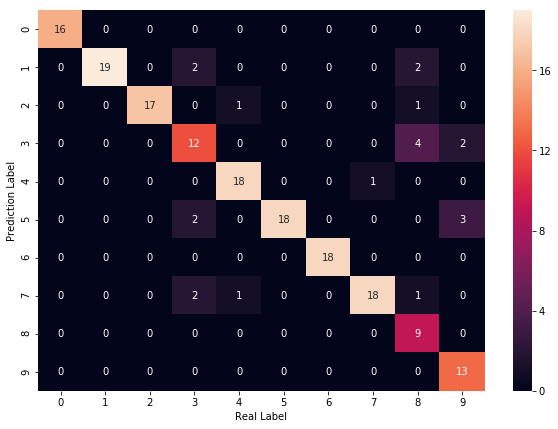

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:72 index:[5] real:5
#1 min_error:74 index:[2] real:2
#2 min_error:72 index:[8] real:8
#3 min_error:16 index:[0] real:0
#4 min_error:52 index:[1] real:1
#5 min_error:51 index:[7] real:7
#6 min_error:30 index:[6] real:6
#7 min_error:51 index:[3] real:3
#8 min_error:36 index:[2] real:2
#9 min_error:47 index:[1] real:1
#10 min_error:67 index:[7] real:7
#11 min_error:86 index:[7] real:4
#12 min_error:43 index:[6] real:6
#13 min_error:54 index:[3] real:3
#14 min_error:47 index:[1] real:1
#15 min_error:65 index:[3] real:3
#16 min_error:81 index:[5] real:9
#17 min_error:50 index:[1] real:1
#18 min_error:60 index:[7] real:7
#19 min_error:28 index:[6] real:6
#20 min_error:77 index:[8] real:8
#21 min_error:28 index:[4] real:4
#22 min_error:54 index:[3] real:3
#23 min_error:61 index:[1] real:1
#24 min_error:39 index:[4] real:4
#25 min_error:31 index:[0] real:0
#26 min_error:54 index:[5] real:5
#27 min_error:49 index:[3] real:3
#28 min_error:65 index:[6] real:6
#29 min_error:63 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9053803339517625
Avg Base Learner:0.7907186147186147


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

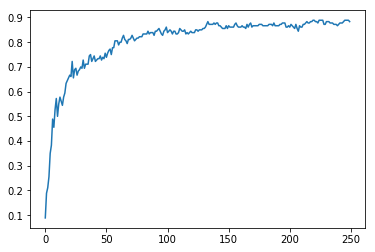

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4481 Total connections::4684
